In [1]:
import numpy as np
import random
import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
from IPython.display import HTML

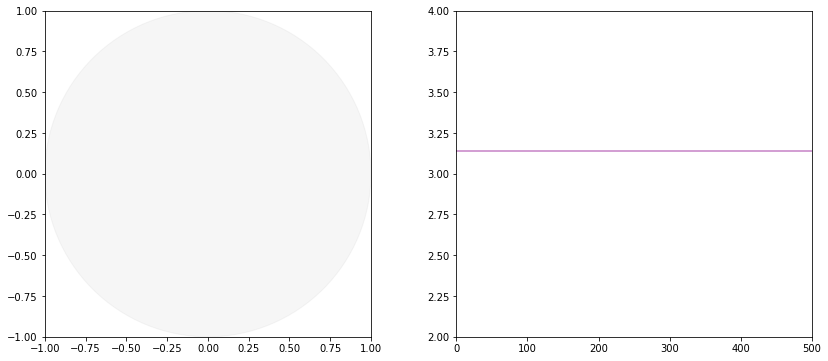

In [8]:
N = 500
x = 2*np.random.random(N)-1
y = 2*np.random.random(N)-1

z = np.zeros(N)
z[x**2+y**2<1] = 1

X = np.arange(1,N)
Y = [4*np.sum(z[:i])/i for i in range(1,N)]

c = np.where(z==0,'cornflowerblue','indianred')

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1],'height_ratios': [1]})
circle = plt.Circle((0, 0), 1, color='darkgrey', alpha=0.1)
ax1.add_patch(circle)
ax1.set(xlim=[-1, 1], ylim=[-1, 1], aspect=1)
scat = ax1.scatter([],[])

ax2.axhline(y=np.pi,xmin=0,xmax=N,c="darkmagenta",alpha=0.5)
ax2.set(xlim=[0, N], ylim=[2, 4])
graph, = ax2.plot([],[],'indianred')

def animationUpdate(k):
    scat.set_offsets(np.c_[x[:k],y[:k]])
    scat.set_facecolors(c[:k])
    graph.set_xdata(X[:k])
    graph.set_ydata(Y[:k])
    return [scat, graph]

ani = animation.FuncAnimation(fig, animationUpdate,repeat=False, frames=N, interval=20)

In [9]:
HTML(ani.to_html5_video())

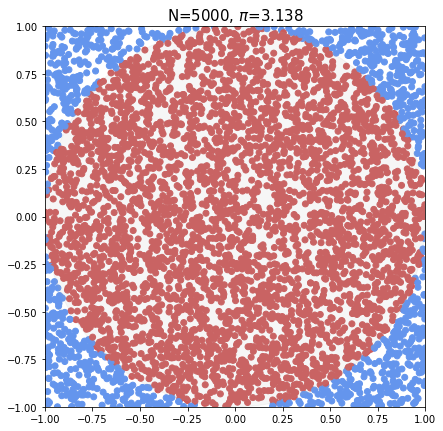

In [6]:
N = 5000
x = 2*np.random.random(N)-1
y = 2*np.random.random(N)-1

z = np.zeros(N)
z[x**2+y**2<1] = 1

pi = 4*np.sum(z)/N

c = np.where(z==0,'cornflowerblue','indianred')

fig, ax1 = plt.subplots(figsize=(7, 7))
circle = plt.Circle((0, 0), 1, color='darkgrey', alpha=0.1)
ax1.add_patch(circle)
ax1.set(xlim=[-1, 1], ylim=[-1, 1], aspect=1)
ax1.set_title("N=%d, $\\pi$=%.3f"%(N,pi), fontsize = 15)
ax1.set_aspect('equal')
scat = ax1.scatter(x,y,color=c)
#fig.savefig("Pi1_5000.pdf", bbox_inches='tight')
plt.show()

In [8]:
def markov_pi(N, delta): 
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)
    X,Y,Z = [x], [y], [0]
    if x**2 + y**2 < 1.0:
        c = ['indianred']
    else:
        c = ['cornflowerblue']
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0:
            c.append('indianred')
            Z.append(1)
        else:
            c.append('cornflowerblue')
            Z.append(0)
        X.append(x)
        Y.append(y)
    return X,Y,Z,c

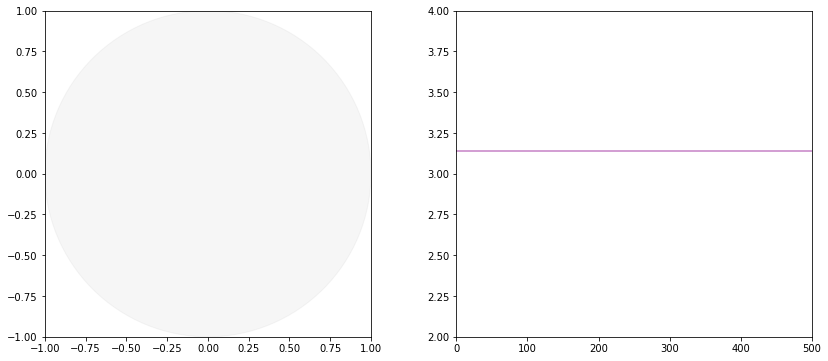

In [13]:
N=500

X1,Y1,Z1,c1 = markov_pi(N, delta=0.2)

X2 = np.arange(1,N)
Y2 = [4*np.sum(Z1[:i])/i for i in range(1,N)]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 6))
circle = plt.Circle((0, 0), 1, color='darkgrey', alpha=0.1)
ax1.add_patch(circle)
ax1.set(xlim=[-1, 1], ylim=[-1, 1], aspect=1)
scat = ax1.scatter([],[])
graph1, = ax1.plot([],[],'k',alpha=0.5)

ax2.axhline(y=np.pi,xmin=0,xmax=N,c="darkmagenta",alpha=0.5)
ax2.set(xlim=[0, N], ylim=[2, 4])
graph2, = ax2.plot([],[],'indianred')

def animationUpdate(k):
    scat.set_offsets(np.c_[X1[:k],Y1[:k]])
    scat.set_facecolors(c1[:k])
    n=min(k,20)
    graph1.set_xdata(X1[k-n:k])
    graph1.set_ydata(Y1[k-n:k])
    graph2.set_xdata(X2[:k])
    graph2.set_ydata(Y2[:k])
    return [scat, graph1, graph2]

ani = animation.FuncAnimation(fig, animationUpdate,repeat=False, frames=N, interval=20)

In [14]:
HTML(ani.to_html5_video())

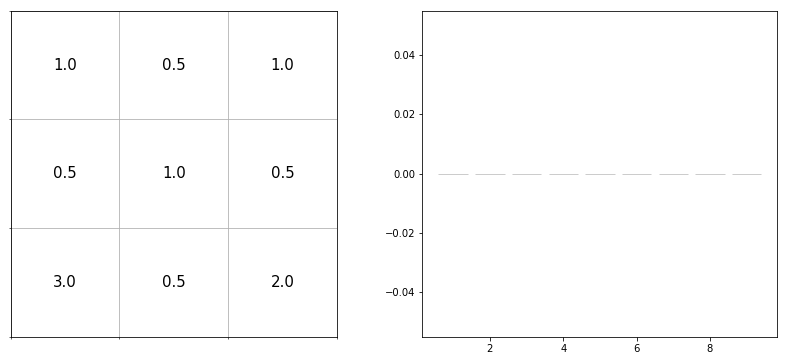

In [72]:
maxnum = 3
numfilled = 40

histo = [0, 0, 0, 0, 0, 0, 0, 0, 0]
h=[histo]
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
weight = [3.0, 0.5, 1.0, 0.5, 1.0, 0.5, 2.0, 0.5, 1.0]
pos = random.randint(0,8)
P=[pos]
n_iter = 3000
for iter in range(n_iter):
    new_pos = neighbor[pos][random.randint(0, 3)]
    if random.random() < weight[new_pos] / weight[pos]:
        pos = new_pos
    histo[pos] += 1
    P.append(pos)
    h.append(histo)

coord=[[i+0.5,j+0.5] for i in range(3) for j in range(3)]

Coord=np.array([coord[i] for i in P])
x=Coord[:,0]
y=Coord[:,1]
    
    

z = []
n=0
for i in range(maxnum):
    for j in range(maxnum):
        z.append([i,j,weight[n]])
        n += 1

fig, (ax,ax2) = plt.subplots(1,2, figsize=(14, 6))

for X,Y,Z in z:
       ax.text(X+0.5,Y+0.5,str(Z), ha='center', va='center', fontsize=15)

ax.set(xlim=[0, maxnum], ylim=[0, maxnum], aspect=1)

for axis in [ax.xaxis, ax.yaxis]:
       axis.set_minor_locator(plt.MultipleLocator(1))
       axis.set_ticks(np.arange(maxnum) + 0.5)
       axis.set_ticklabels(range(maxnum))

ax.grid(which='minor')
ax.set_xticks([])
ax.set_yticks([])

#coord=np.array(coord)
#ax.scatter(coord[:,0],coord[:,1])

scat = ax.scatter([],[], s=1000, alpha=0.8,c="rosybrown")
graph, = ax.plot([],[],'k',alpha=0.5)

def animationUpdate(k):
    global histo
    if k==0: histo = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    n,m=min(k,1),min(k,5)
    scat.set_offsets(np.c_[x[k-n:k],y[k-n:k]])
    graph.set_xdata(x[k-m:k])
    graph.set_ydata(y[k-m:k])
    ax2.clear()
    ax2.bar(np.arange(1,10),height=histo,color="rosybrown")
    b = np.array(weight)/sum(weight) * sum(histo)
    ax2.bar(np.arange(1,10),b,edgecolor='black', color='none', alpha=0.2)
    
    histo[P[k]] += 1
    return [scat, graph]

ani = animation.FuncAnimation(fig, animationUpdate,repeat=False, frames=n_iter, interval=5)

In [73]:
HTML(ani.to_html5_video())

In [39]:
colors = ['palevioletred', 'sandybrown', 'c', 'mediumseagreen']

def wall_time(pos_a, vel_a, sigma):
    if vel_a > 0.0:
        del_t = (1.0 - sigma - pos_a) / vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma) / abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    Upsilon = scal ** 2 - del_v_sq * (del_x_sq - 4.0 * sigma ** 2)
    if Upsilon > 0.0 and scal < 0.0:
        del_t = - (scal + math.sqrt(Upsilon)) / del_v_sq
    else:
        del_t = float('inf')
    return del_t

def min_arg(l):
    return min(zip(l, range(len(l))))

def compute_next_event(pos, vel):
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l in singles]
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    return min_arg(wall_times + pair_times)

def compute_new_velocities(pos, vel, next_event_arg):
    if next_event_arg < len(singles):
        collision_disk, direction = singles[next_event_arg]
        vel[collision_disk][direction] *= -1.0
    else:
        a, b = pairs[next_event_arg - len(singles)]
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2)
        e_perp = [c / abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        for k in range(2):
            vel[a][k] += e_perp[k] * scal
            vel[b][k] -= e_perp[k] * scal

In [40]:
pos = np.array([[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]])
vel = np.array([[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]])
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
sigma = 0.15
t = 0.0
dt = 0.02     # dt=0 corresponds to event-to-event animation
n_steps = 100
next_event, next_event_arg = compute_next_event(pos, vel)

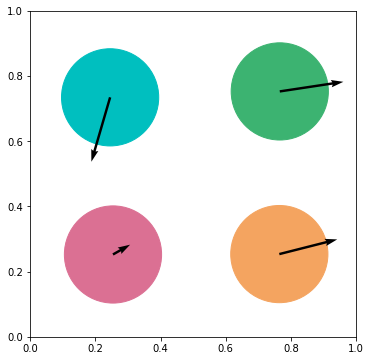

In [41]:
fig_s=5
xy_lim=0.9
points_whole_ax = fig_s * xy_lim * 72    # 1 point = dpi / 72 pixels
radius = 0.15
points_radius = 2 * radius / 1.0 * points_whole_ax
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(pos[:,0],pos[:,1],s=points_radius**2,c=colors)
ax.quiver(pos[:,0],pos[:,1], vel[:,0], vel[:,1],scale=4)

def animationUpdate(step):
    global dt
    global t
    global next_t
    global next_event
    global pos
    global vel
    global next_event_arg
    if dt:
        next_t = t + dt
    else:
        next_t = t + next_event
    while t + next_event <= next_t:
        t += next_event
        for k, l in singles: pos[k][l] += vel[k][l] * next_event
        compute_new_velocities(pos, vel, next_event_arg)
        next_event, next_event_arg = compute_next_event(pos, vel)
    remain_t = next_t - t
    for k, l in singles: pos[k][l] += vel[k][l] * remain_t
    t += remain_t
    next_event -= remain_t
    ax.clear()
    ax.scatter(pos[:,0],pos[:,1],s=points_radius**2,c=colors)
    ax.quiver(pos[:,0],pos[:,1], vel[:,0], vel[:,1],scale=4)
    ax.set(xlim=[0, 1], ylim=[0,1],aspect=1)
    
ani = animation.FuncAnimation(fig, animationUpdate,repeat=False, frames=1000, interval=25)

In [42]:
HTML(ani.to_html5_video())

In [44]:
def direct_disks_box(N, sigma):
    condition = False
    e = 0
    while condition == False:
        L = [[random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma)]]
        for k in range(1, N):
            a = [random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma)]
            min_dist = min(math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) for b in L) 
            if min_dist < 2.0 * sigma: 
                condition = False
                break
            else:
                L.append(a)
                condition = True
        e += 1
        if e>100000:
            print('Error: To low acceptance rate!')
            return L
    return L

In [45]:
pos = np.array([[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]])
vel = np.array([[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]])
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
sigma = 0.15
t = 0.0
dt = 0.02     # dt=0 corresponds to event-to-event animation
n_steps = 100
next_event, next_event_arg = compute_next_event(pos, vel)

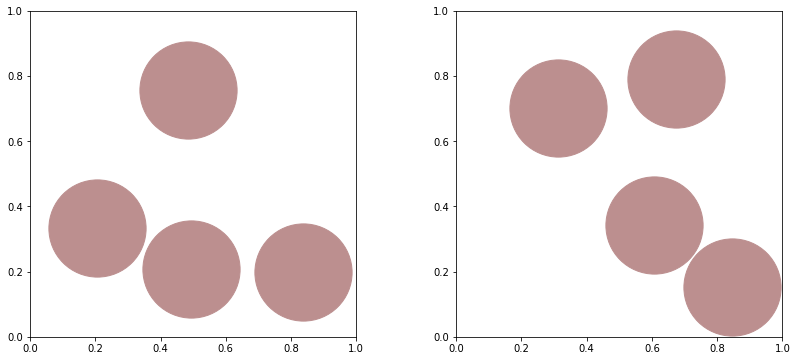

In [48]:
x = np.array([])
for i in range(50):
    x = np.append(x,direct_disks_box(4,0.15))
x = x.reshape(50,4,2)

fig_s=5
xy_lim=0.9
points_whole_ax = fig_s * xy_lim * 72    # 1 point = dpi / 72 pixels
radius = 0.15
points_radius = 2 * radius / 1.0 * points_whole_ax
fig, (ax,ax2) = plt.subplots(1,2, figsize=(14, 6))


def animationUpdate(k):
    ax.clear()
    ax.scatter(x[k,:,0],x[k,:,1],s=points_radius**2,c='rosybrown')
    ax.set(xlim=[0, 1], ylim=[0,1],aspect=1)
    
    global dt
    global t
    global next_t
    global next_event
    global pos
    global vel
    global next_event_arg
    for k in range(100):
        if dt:
            next_t = t + dt
        else:
            next_t = t + next_event
        while t + next_event <= next_t:
            t += next_event
            for k, l in singles: pos[k][l] += vel[k][l] * next_event
            compute_new_velocities(pos, vel, next_event_arg)
            next_event, next_event_arg = compute_next_event(pos, vel)
        remain_t = next_t - t
        for k, l in singles: pos[k][l] += vel[k][l] * remain_t
        t += remain_t
        next_event -= remain_t
    ax2.clear()
    ax2.scatter(pos[:,0],pos[:,1],s=points_radius**2,c='rosybrown')
    ax2.set(xlim=[0, 1], ylim=[0,1],aspect=1)
    
ani = animation.FuncAnimation(fig, animationUpdate,repeat=False, frames=50, interval=200)

In [49]:
HTML(ani.to_html5_video())

In [47]:
def direct_disks_box(N, sigma):
    condition = False
    e = 0
    while condition == False:
        L = [[random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma)]]
        for k in range(1, N):
            a = [random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma)]
            min_dist = min(math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) for b in L) 
            if min_dist < 2.0 * sigma: 
                condition = False
                break
            else:
                L.append(a)
                condition = True
        e += 1
        if e>100000:
            print('Error: To low acceptance rate!')
            return L
    return L

def plot_direct_disks_box(steps, N=3, sigma=0.2):
    x = np.array([])
    for i in range(steps):
        x = np.append(x,direct_disks_box(N,sigma))
    plt.hist2d(x[::2],x[1::2],150,cmap=plt.cm.hot)
    plt.colorbar()
    plt.title("2D box: N=%d, l=1, h=1, r=%.1f, %d iterations"%(N,sigma,steps))
    #plt.savefig("D3.pdf", bbox_inches='tight')
    plt.show()

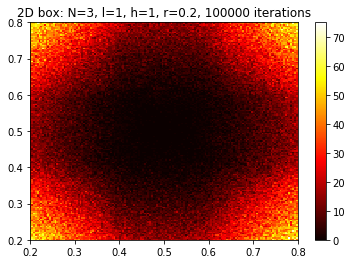

In [48]:
plot_direct_disks_box(100000)

In [27]:
N = 10
L = 20.0
sigma = 0.75
n_runs = 100000
data = []
for run in range(n_runs):
    y = [random.uniform(0.0, L - 2 * N * sigma) for k in range(N)]
    y.sort()
    data += [y[i] + (2 * i + 1) * sigma for i in range(N)]

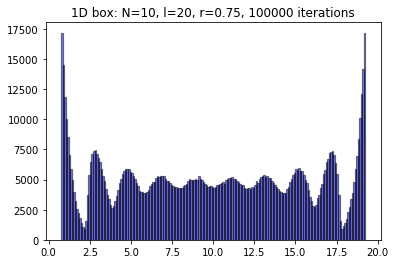

In [56]:
#plt.figure(figsize=[14,7])
plt.hist(data,200,facecolor='blue', alpha=0.5,edgecolor='black', linewidth=1.2)
plt.title("1D box: N=%d, l=%.0f, r=%.2f, %d iterations"%(N,L,sigma,n_runs))
#plt.xlabel("x", fontsize=15)
#plt.ylabel("#", fontsize=15)
#plt.savefig("D4.pdf", bbox_inches='tight')
#plt.yticks(fontsize=15)
#plt.xticks(fontsize=15)
plt.show()

C:\Users\rapha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


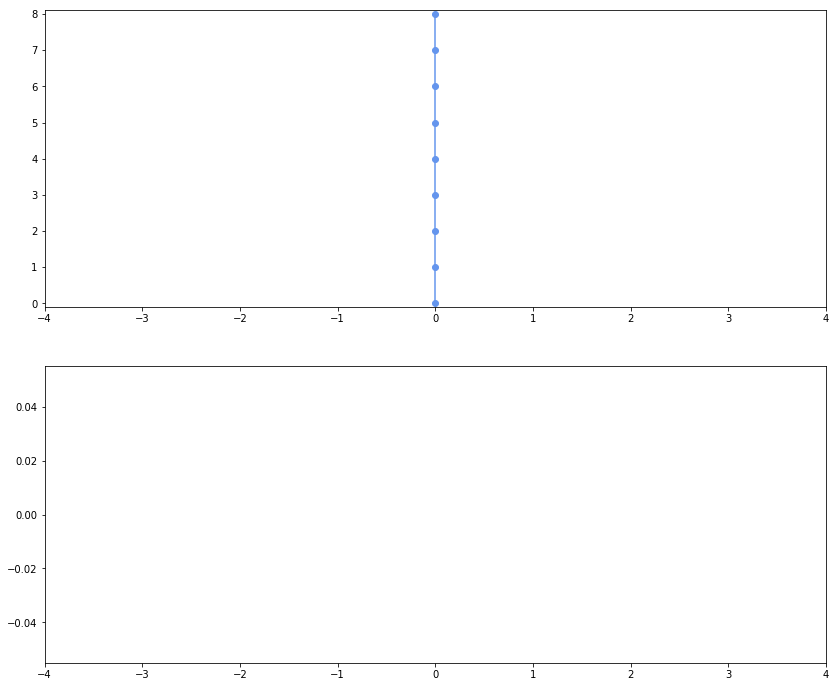

In [58]:
X = np.linspace(-4,4)
Y = X**2

histo = []

def rho_free(x, y, beta):        # free off-diagonal density matrix
    return math.exp(-(x - y) ** 2 / (2.0 * beta))

def show_path(x, k, x_old, Accepted, step):
    path = x + [x[0]]
    y_axis = range(len(x) + 1)
    if Accepted:
        old_path = x[:]
        old_path[k] = x_old
        old_path = old_path + [old_path[0]]
        ax.plot(old_path, y_axis, 'o--',c='indianred', label='old path')
    ax.plot(path, y_axis, 'o-',c='cornflowerblue', label='new path')
    ax.set(xlim=[-4, 4], ylim=[-0.1,8.1])

beta = 4.0
N = 8                                                # number of slices
dtau = beta / N
delta = 1.0                                          # maximum displacement on one slice
n_steps = 30                                         # number of Monte Carlo steps
x = [0 for k in range(N)]   # initial path
fig, (ax,ax2) = plt.subplots(2,1,figsize=(14, 12))

show_path(x, 0, 0.0, False, 0)
def animationUpdate(step):
    ax.clear()
    ax2.clear()
    global x
    global histo
    k = random.randint(0, N - 1)                     # randomly choose slice
    knext, kprev = (k + 1) % N, (k - 1) % N          # next/previous slices
    x_old = x[k]
    x_new = x[k] + random.uniform(-delta, delta)     # new position at slice k
    old_weight  = (rho_free(x[knext], x_old, dtau) *
                   rho_free(x_old, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_old ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
        Accepted = True
    else:
        Accepted = False
    
    ax2.hist(histo,bins=[-2+0.125*i for i in range(4*8+1)],
            density=1,facecolor='blue', alpha=0.5,edgecolor='black', linewidth=1.2)
    ax2.set(xlim=[-4, 4])
    histo.append(x[k])
    
    show_path(x, k, x_old, Accepted, step + 1)
    
ani = animation.FuncAnimation(fig, animationUpdate,repeat=False, frames=1500, interval=20)

In [59]:
HTML(ani.to_html5_video())

In [58]:
def rho_free(x, y, beta):        # free off-diagonal density matrix
    return math.exp(-(x - y) ** 2 / (2.0 * beta))
beta = 4
N = 8                                                # number of slices
dtau = beta / N
delta = 1.0                                          # maximum displacement on one slice
n_steps = 1000000                                         # number of Monte Carlo steps
x = [random.uniform(-1.0, 1.0) for k in range(N)]   # initial path
histo=[]
for step in range(n_steps):
    k = random.randint(0, N - 1)                     # randomly choose slice
    knext, kprev = (k + 1) % N, (k - 1) % N          # next/previous slices
    x_old = x[k]
    x_new = x[k] + random.uniform(-delta, delta)     # new position at slice k
    old_weight  = (rho_free(x[knext], x_old, dtau) *
                   rho_free(x_old, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_old ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
        Accepted = True
    else:
        Accepted = False
    histo.append(x[k])
    

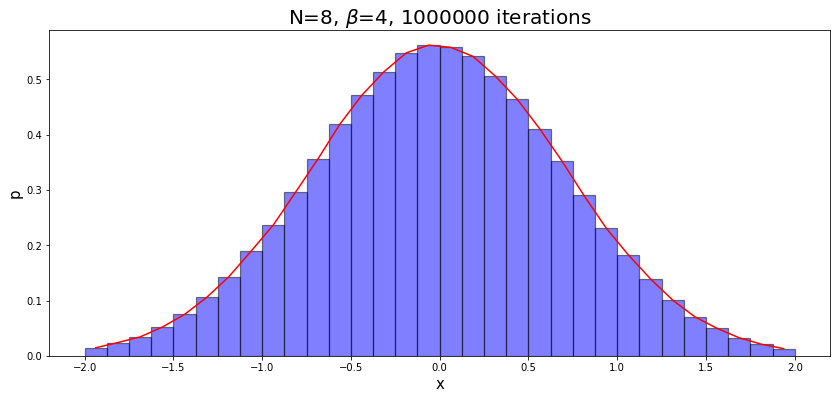

In [71]:
fig, ax = plt.subplots(figsize=(14,6))
n, bins, patches = ax.hist(histo,bins=[-2+0.125*i for i in range(4*8+1)], density=1,facecolor='blue', alpha=0.5,edgecolor='black', linewidth=1.2)
ax.plot(bins[1:]-0.125/2,n,'r')
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('p',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('N=8, $\\beta$=4, 1000000 iterations', fontsize=20)
#plt.savefig("H2.pdf", bbox_inches='tight')
plt.show()

In [72]:
def energy(S, N, nbr):
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in nbr[k])
    return 0.5 * E

-128.0


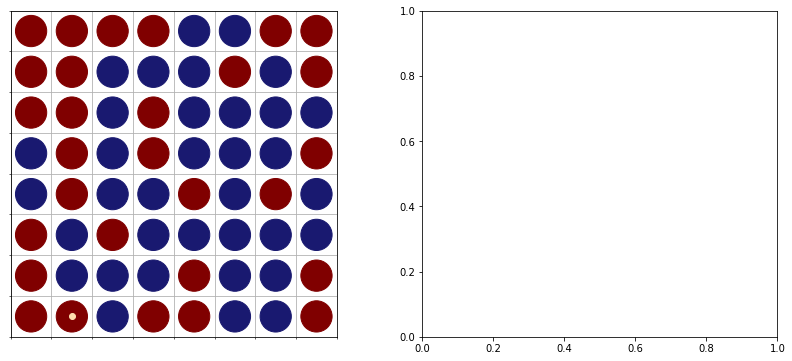

In [76]:
beta = 0.04
L = 8
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N)
                                    for i in range(N)}

S = np.array([random.choice([1, -1]) for k in range(N)])
E = energy(S, N, nbr)

E_max = energy([1 for i in range(N)], N , nbr)
print(E_max)
E_avg = [E]
colors = np.where(S==1, 'maroon', 'midnightblue')

fig, (ax,ax2) = plt.subplots(1,2, figsize=(14, 6))

ax.set(xlim=[0, L], ylim=[0, L], aspect=1)

for axis in [ax.xaxis, ax.yaxis]:
       axis.set_minor_locator(plt.MultipleLocator(1))
       axis.set_ticks(np.arange(L) + 0.5)
       axis.set_ticklabels(range(L))
        
ax.grid(which='minor')

coord=np.array([[i+0.5,j+0.5] for i in range(L) for j in range(L)])

x=coord[:,0]
y=coord[:,1]

scat = ax.scatter(x,y,s=250**2/N,c=colors)
scat2 = ax.scatter([],[])

n=0
def animationUpdate(step):
    global S
    global E
    global E_avg
    global colors
    global n
    global k
    global l
    
    if n%2 == 0:
        k = random.randint(0, N - 1)
        l = nbr[k][random.randint(0, 3)]
        scat2.set_offsets(np.c_[[x[k]],[y[k]]])
        scat2.set_facecolors(['navajowhite'])
        n += 1
        return scat2
    
    S_new = S.copy()
    S_new[k] *= -1
    E_new = energy(S_new, N, nbr)
    delta_E = E_new - E
    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
        S = S_new
        E = E_new
        colors[k] = np.where(colors[k]=='maroon', 'midnightblue', 'maroon')
    E_avg.append(E)
    scat.set_facecolors(colors)
    ax2.clear()
    ax2.hist(E_avg, density=1,facecolor='blue', alpha=0.5,edgecolor='black', linewidth=1.2)
    #ax2.set(xlim=[-E_max-1, -E_max+1])
    n += 1
    return scat

ax.set_xticks([])
ax.set_yticks([])

ani = animation.FuncAnimation(fig, animationUpdate,repeat=False, frames=400, interval=50)

In [77]:
HTML(ani.to_html5_video())

In [102]:
beta = 0.04
L = 8
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N)
                                    for i in range(N)}


S = np.array([random.choice([1, -1]) for k in range(N)])
E = energy(S, N, nbr)

E_max = energy([1 for i in range(N)], N , nbr)
E_avg = [E]

steps=100000
for i in range(steps):
    k = random.randint(0, N - 1)
    l = nbr[k][random.randint(0, 3)]
    S_new = S.copy()
    S_new[k] *= -1
    E_new = energy(S_new, N, nbr)
    delta_E = E_new - E
    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
        S = S_new
        E = E_new
    E_avg.append(E)

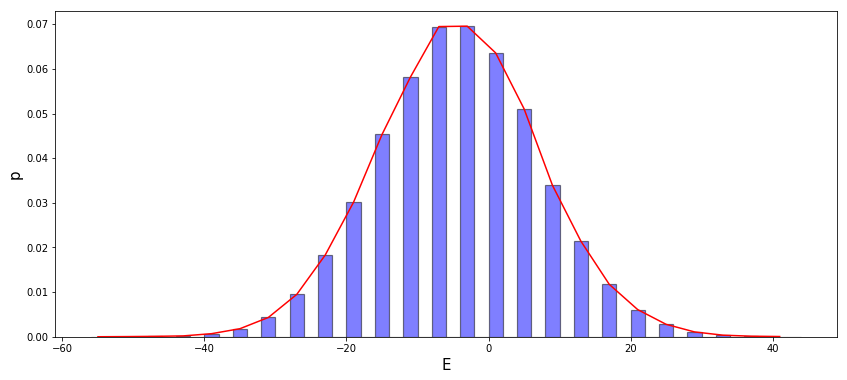

In [101]:
fig, ax = plt.subplots(figsize=(14, 6))
n, bins, patches = ax.hist(E_avg,50, density=1,facecolor='blue', alpha=0.5,edgecolor='black', linewidth=1.2)
ax.plot(bins[1::2]-1,n[::2],'r')
ax.set_xlabel('E',fontsize=15)
ax.set_ylabel('p',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.title('L=8, $\\beta$=0.04, 100000 iterations', fontsize=20)
#plt.savefig("I3.pdf", bbox_inches='tight')
plt.show()
